In [1]:
!pip install ydata-profiling

In [2]:
import pandas as pd
import ydata_profiling

df = pd.read_csv("https://raw.githubusercontent.com/Renend/Read-CSV/main/StudentsPerformance.csv")
pr = df.profile_report()
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [5]:
df.describe()

,math score,reading score,writing score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


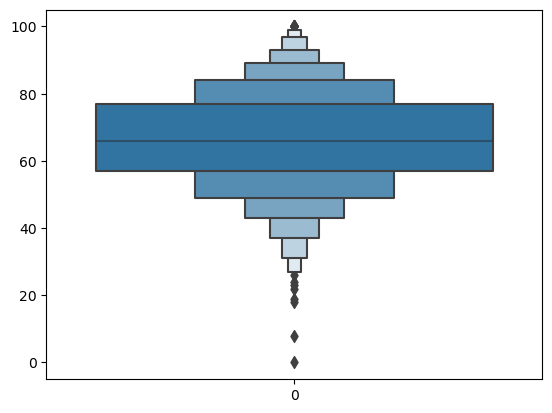

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

sns.boxenplot(df['math score'])
plt.show()

In [7]:
sorted(df["math score"])
df[df['math score']>10]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


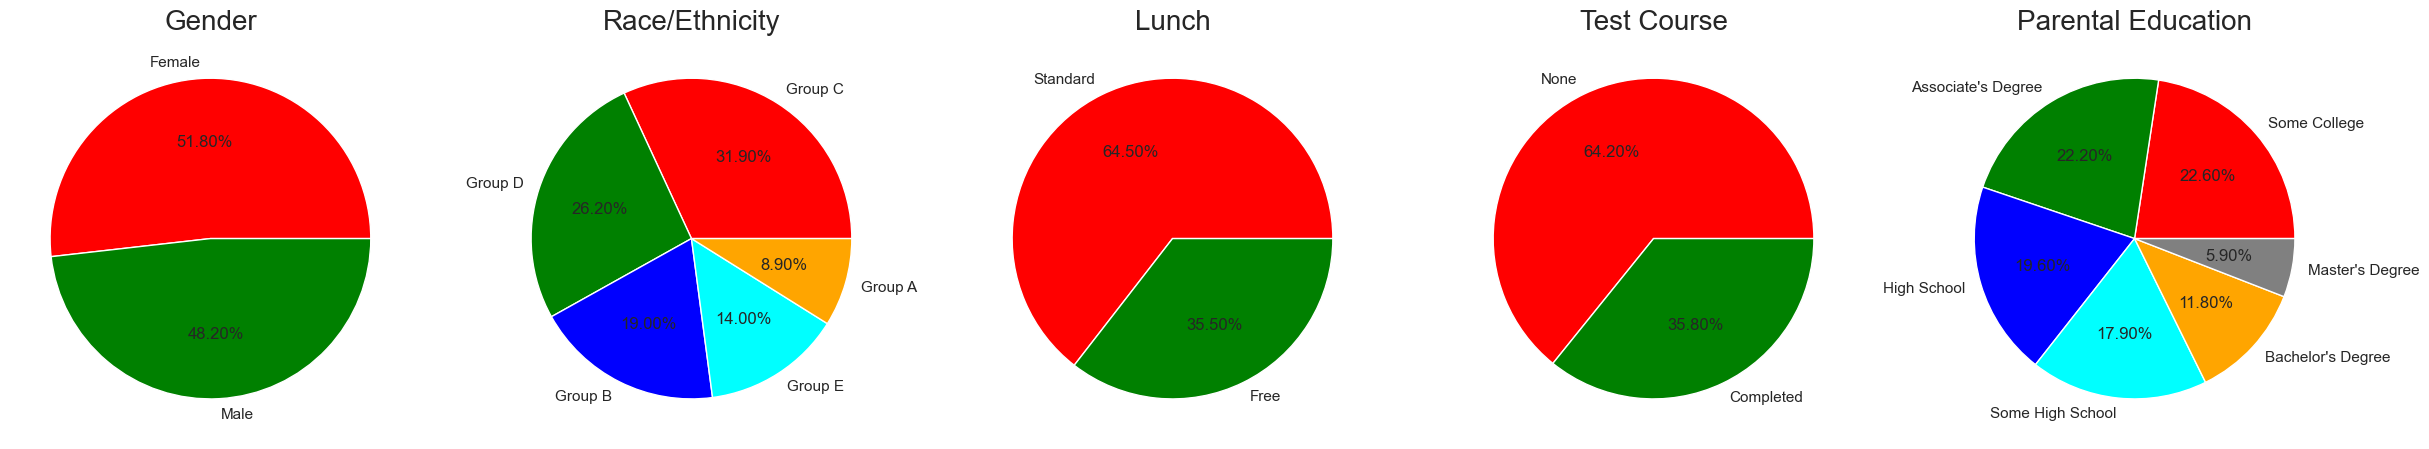

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.grid()
plt.show()

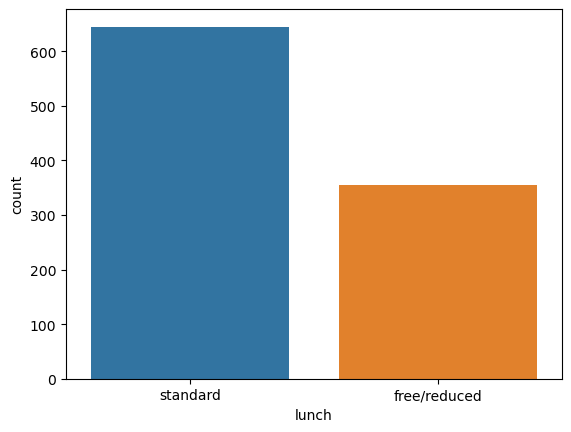

In [8]:
sns.barplot(x=df['lunch'].value_counts().index, y=df['lunch'].value_counts())
plt.show()

In [9]:
df.groupby('race/ethnicity').sum().reset_index().head()

,race/ethnicity,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,group A,malemalefemalemalefemalemalemalefemalemalemale...,associate's degreesome collegemaster's degreem...,free/reducedstandardstandardfree/reducedstanda...,nonecompletednonenonecompletednonenonenonecomp...,5485,5756,5578,16819,5606.333333
1,group B,femalefemalefemalefemalemalefemalefemalefemale...,bachelor's degreemaster's degreeassociate's de...,standardstandardstandardstandardfree/reducedfr...,nonenonenonecompletednonenonenonenonecompleted...,12056,12797,12464,37317,12439.000000
2,group C,femalemalemalefemalemalemalefemalefemalefemale...,some collegesome collegeassociate's degreesome...,standardstandardstandardstandardstandardfree/r...,completednonenonenonenonecompletednonenonenone...,20564,22044,21637,64245,21415.000000
3,group D,malemalemalemalemalefemalefemalemalefemalefema...,high schoolassociate's degreehigh schoolsome c...,free/reducedstandardstandardstandardfree/reduc...,completednonenonenonecompletednonenonenonenone...,17649,18348,18378,54375,18125.000000
4,group E,femalemalemalefemalemalemalefemalemalemalefema...,master's degreesome collegeassociate's degreea...,free/reducedstandardstandardfree/reducedstanda...,nonenonecompletednonenonecompletedcompletedcom...,10335,10224,9997,30556,10185.333333


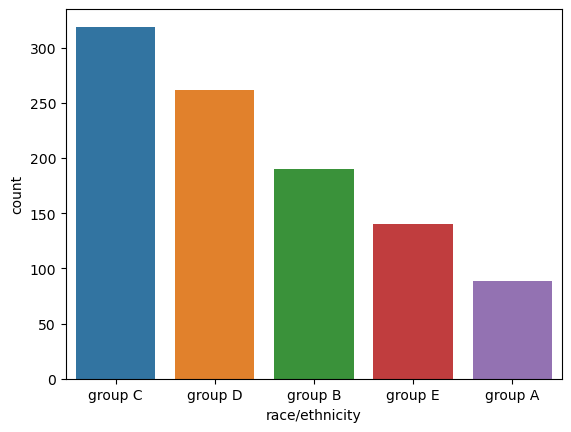

In [10]:
sns.barplot(x=df['race/ethnicity'].value_counts().index, y=df['race/ethnicity'].value_counts())
plt.show()

In [11]:
df.groupby('gender').sum().reset_index().head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.000000
1,male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.666667


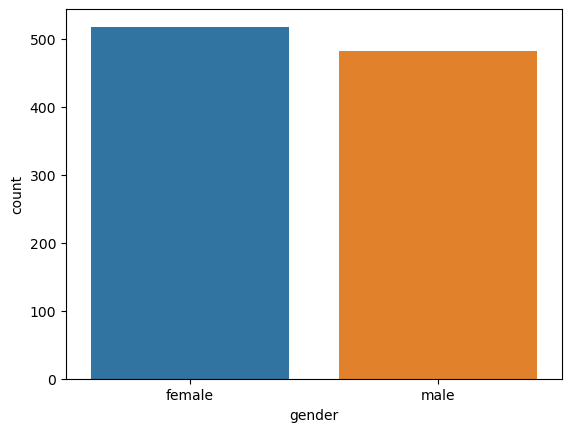

In [12]:
sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts())
plt.show()

In [13]:
df.groupby('test preparation course').sum().reset_index().head()

,test preparation course,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total score,average
0,completed,femalefemalemalemalemalefemalemalemalefemalema...,group Cgroup Bgroup Dgroup Agroup Cgroup Bgrou...,some collegesome collegehigh schoolsome colleg...,standardstandardfree/reducedstandardfree/reduc...,24951,26454,26642,78047,26015.666667
1,none,femalefemalemalemalefemalemalefemalemalemalefe...,group Bgroup Bgroup Agroup Cgroup Bgroup Bgrou...,bachelor's degreemaster's degreeassociate's de...,standardstandardfree/reducedstandardstandardfr...,41138,42715,41412,125265,41755.000000


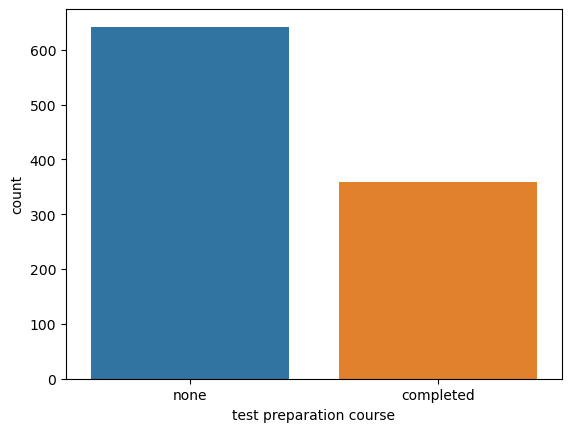

In [14]:
sns.barplot(x=df['test preparation course'].value_counts().index, y=df['test preparation course'].value_counts())
plt.show()

In [15]:
print(pd.pivot_table(df, index = 'parental level of education', columns = 'lunch', 
                     values = 'reading score', aggfunc ='mean'))
print()
print(pd.pivot_table(df, index = 'parental level of education', columns = 'gender',
                     values = 'reading score', aggfunc ='mean'))
print()
print(pd.pivot_table(df, index = 'parental level of education', columns = 'test preparation course',
                     values = 'reading score', aggfunc ='mean'))

lunch                        free/reduced   standard
parental level of education                         
associate's degree              67.649351  72.668966
bachelor's degree               68.931818  75.418919
high school                     60.214286  67.198413
master's degree                 70.291667  78.857143
some college                    65.075949  71.816327
some high school                60.114754  70.466102

gender                          female       male
parental level of education                      
associate's degree           74.120690  67.433962
bachelor's degree            77.285714  68.090909
high school                  68.202128  61.480392
master's degree              76.805556  73.130435
some college                 73.550847  64.990741
some high school             69.109890  64.693182

test preparation course      completed       none
parental level of education                      
associate's degree           76.170732  67.857143
bachelor's degree       

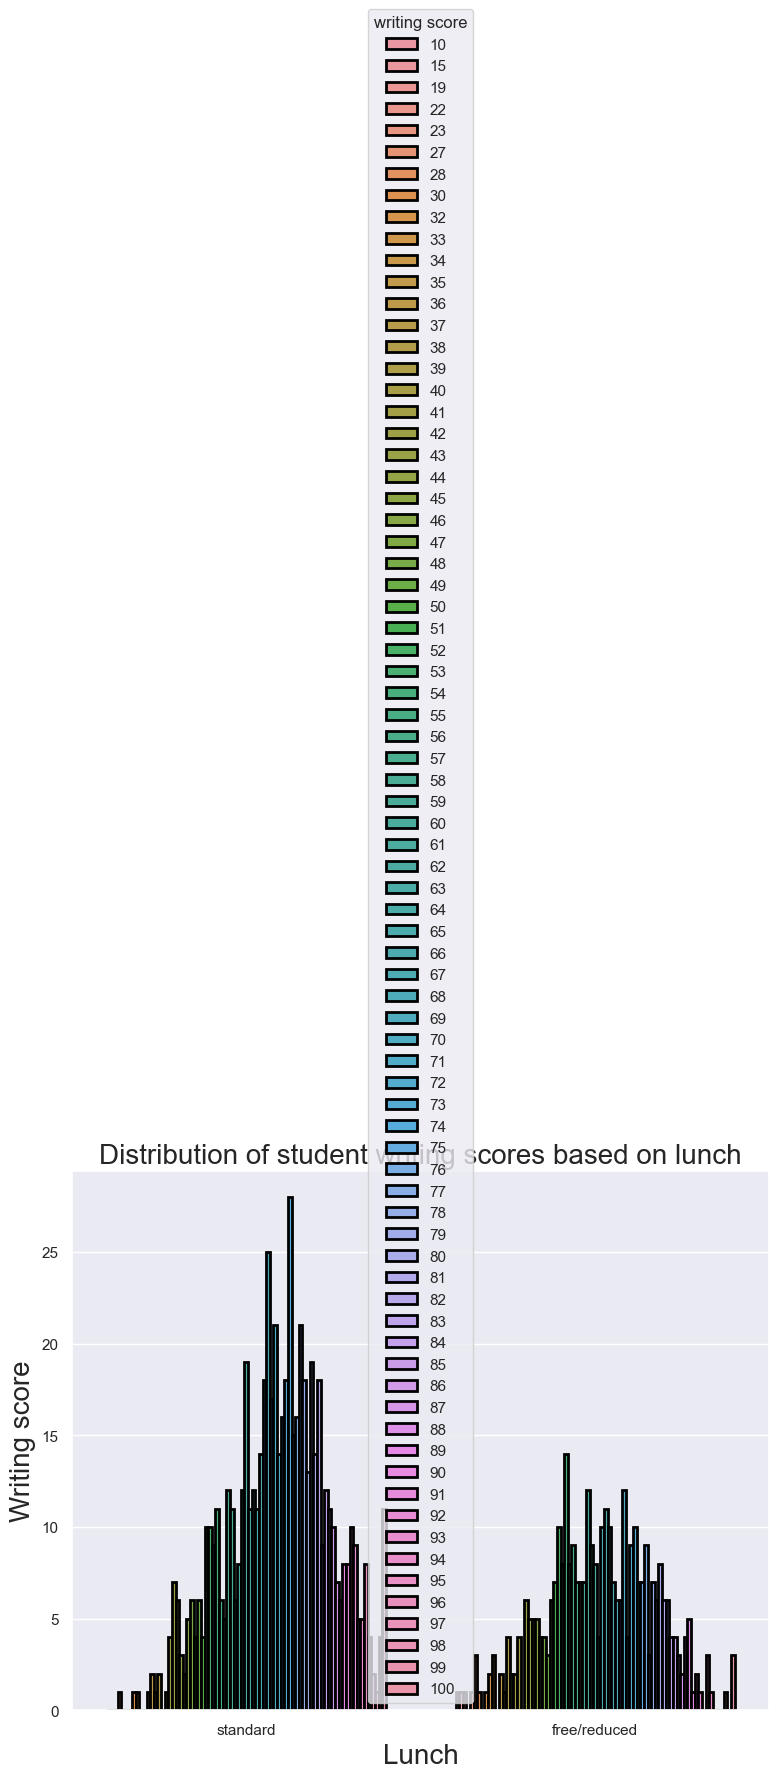

In [16]:
sns.set(style='darkgrid')
plt.subplots(figsize = (9,7))
ax=sns.countplot(x='lunch', data = df, hue='writing score', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Distribution of student writing scores based on lunch', fontsize=20)
plt.xlabel('Lunch', fontsize=20)
plt.ylabel("Writing score", fontsize = 20)
labels = ['Standard', 'Free/reduced']

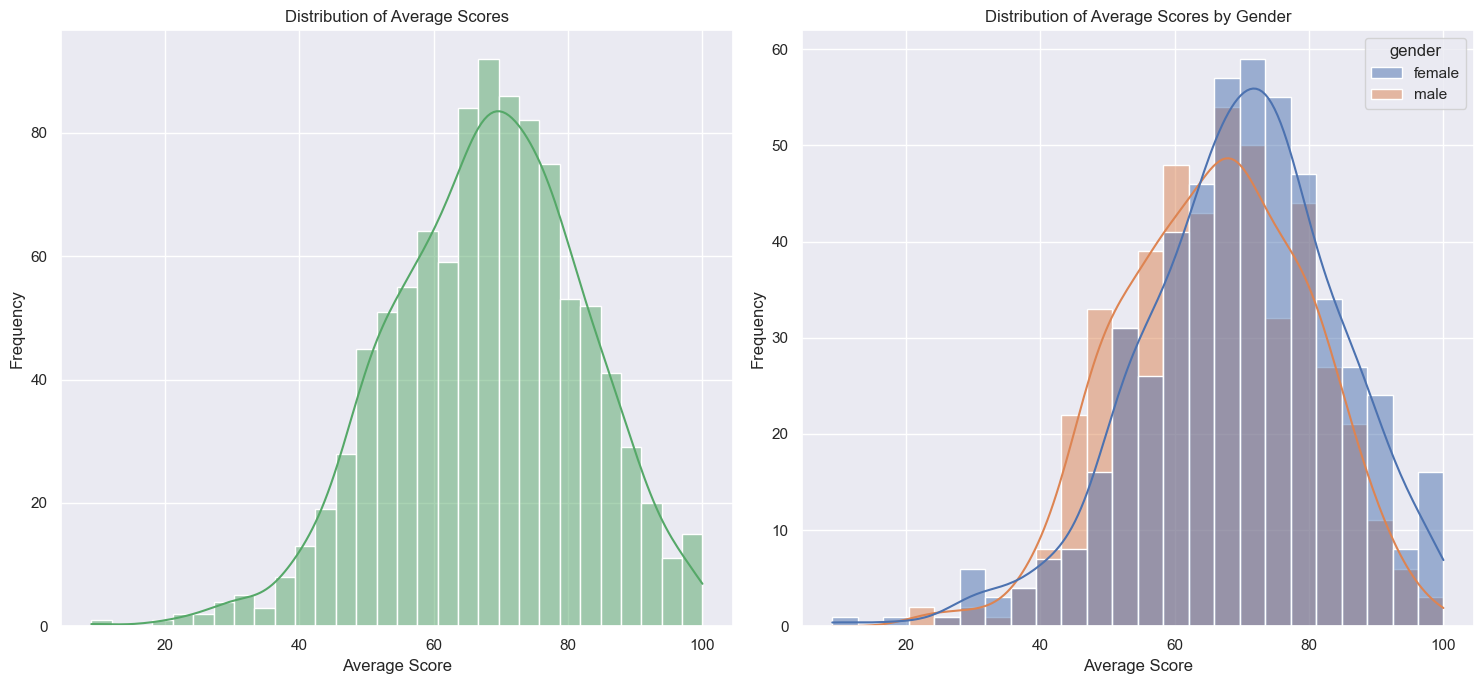

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/var/folders/ky/8b9p1t_x1ng9r74j4j_slgh00000gn/T/ipykernel_4391/1923850249.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/var/folders/ky/8b9p1t_x1ng9r74j4j_slgh00000gn/T/ipykernel_4391/1923850249.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/var/folders/ky/8b9p1t_x1ng9r74j4j_slgh00000gn/T/ipykernel_4391/1923850249.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


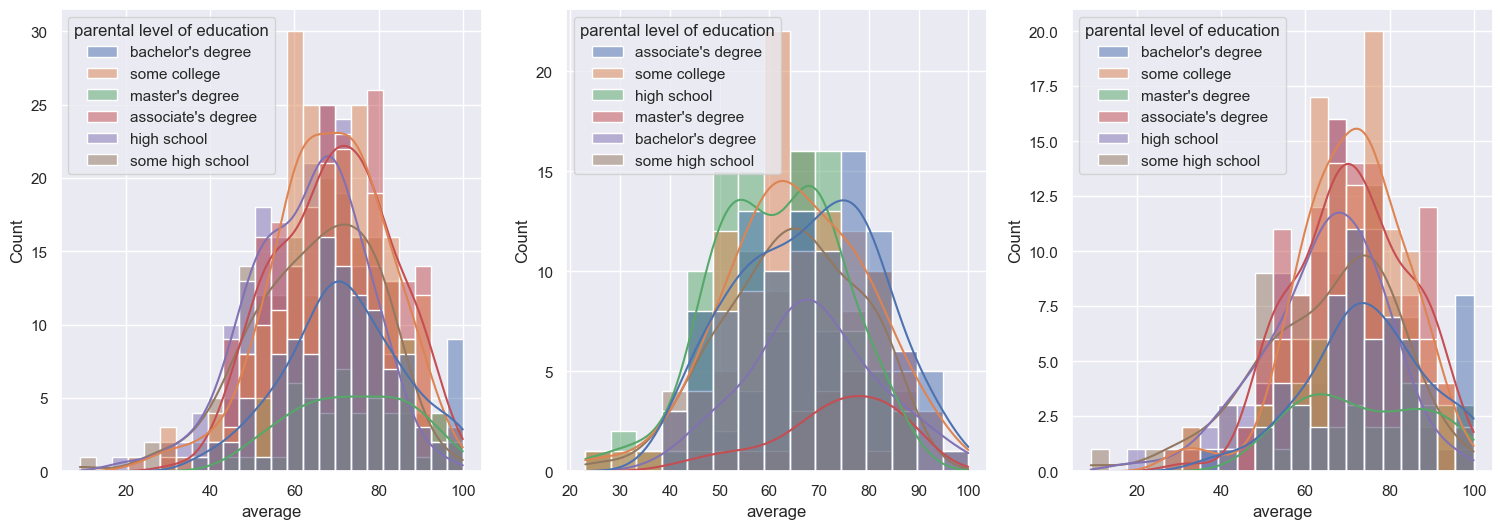

In [20]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')

plt.show()

/Users/renee/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


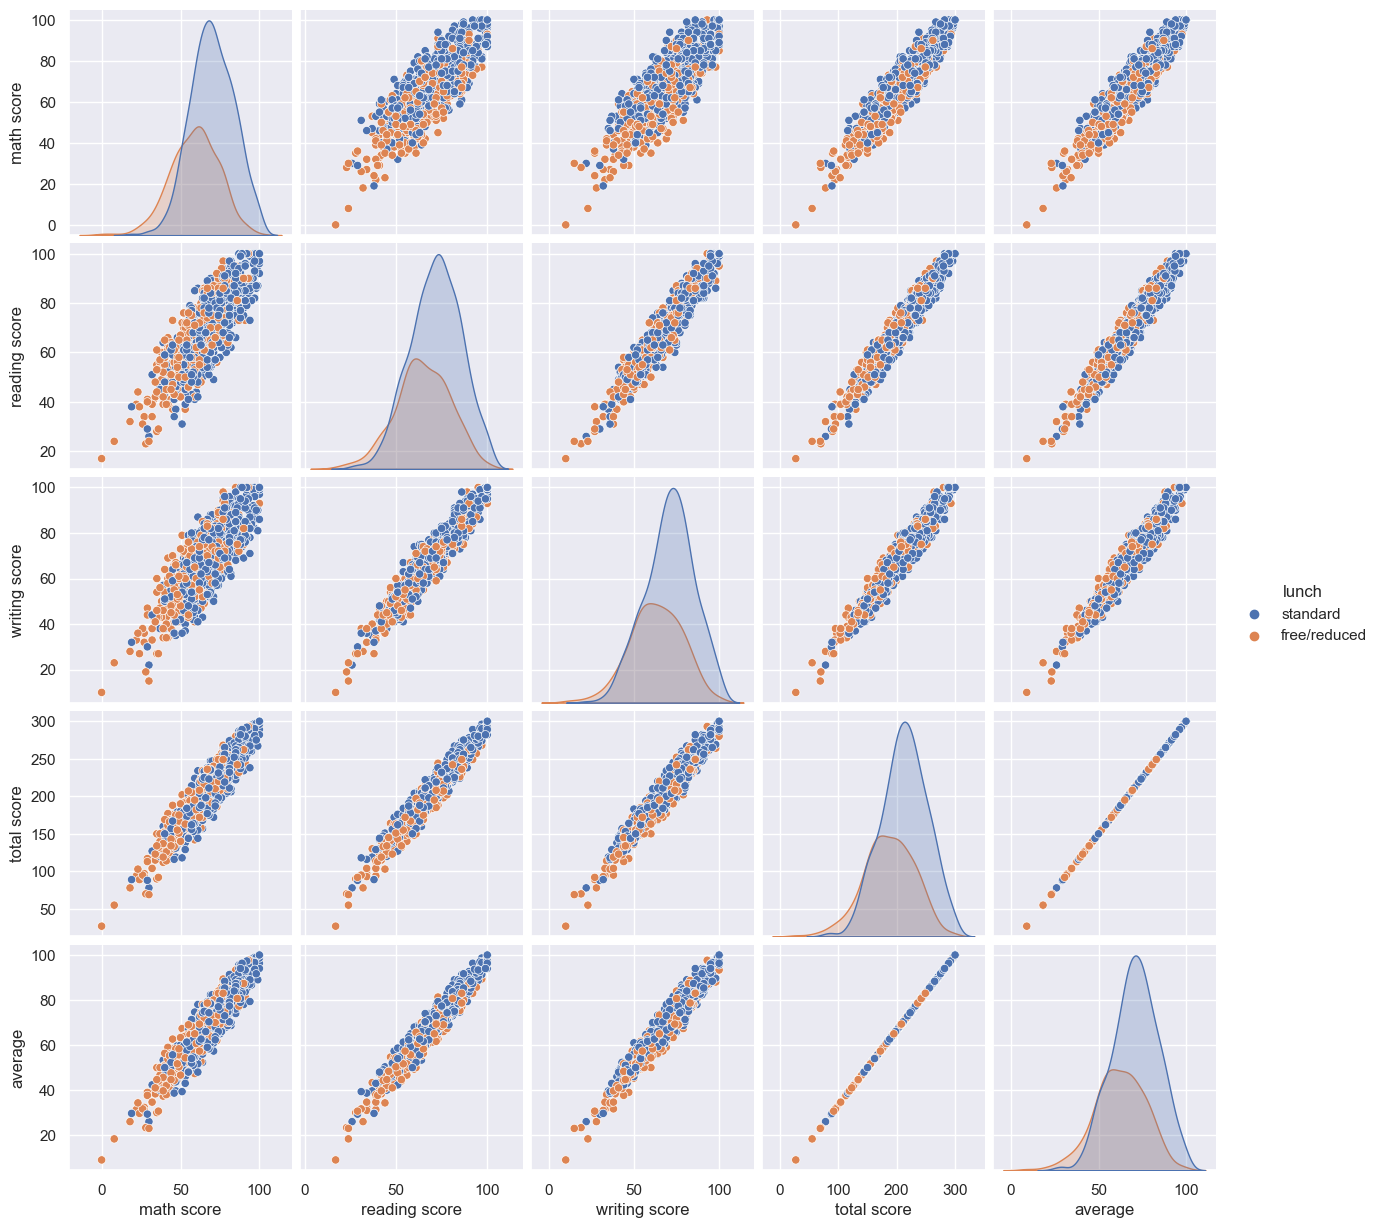

In [22]:
sns.pairplot(df,hue = 'lunch')
plt.show()